Documento de atualização: https://docs.google.com/document/d/1hkFY-cf2JudmHilkpKqJrHQtzz_EAw0hLCWj14SRsRc/edit?usp=sharing

Dados de GeoJSON: Redes de https://mapas.fortaleza.ce.gov.br/

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("https://www.sspds.ce.gov.br/wp-content/uploads/sites/24/2025/03/CVLI_2009-2024.xlsx", engine="openpyxl")

In [ ]:
df.head()

,Município,AIS,Natureza,Data,Hora,Dia da Semana,Meio Empregado,Gênero,Idade da Vítima,Escolaridade da Vítima,Raça da Vítima
0,Quixadá,AIS 20,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,Não Informada,Não Informada,Não Informada
1,Baturité,AIS 15,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,Não Informada,Não Informada,Não Informada
2,Maracanaú,AIS 12,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,Não Informada,Não Informada,Não Informada
3,Maranguape,AIS 24,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,Não Informada,Não Informada,Não Informada
4,Fortaleza,AIS 10,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,Não Informada,Não Informada,Não Informada


In [ ]:
df.describe()

,Data
count,56319
mean,2017-01-16 09:15:44.057955584
min,2009-01-01 00:00:00
25%,2013-08-07 00:00:00
50%,2017-01-27 00:00:00
75%,2020-07-24 00:00:00
max,2024-12-31 00:00:00


array([[<Axes: title={'center': 'Data'}>]], dtype=object)

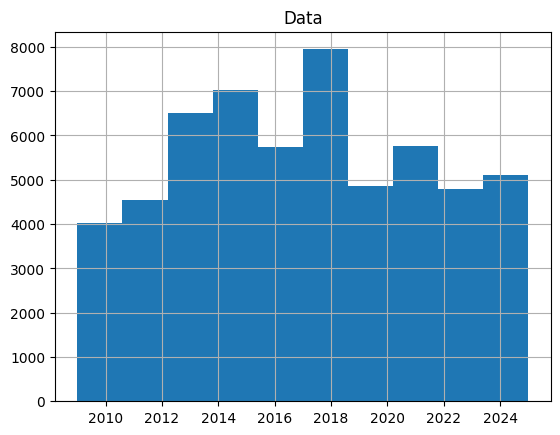

In [ ]:
df.hist()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['Data'] = pd.to_datetime(df['Data'])

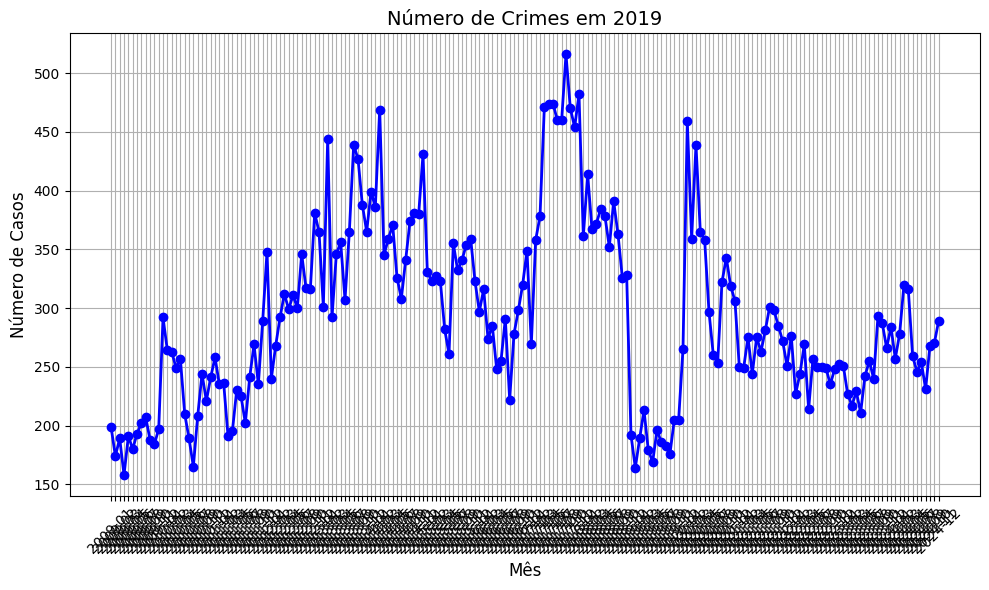

In [ ]:
casos_por_mes = df.groupby(df['Data'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
plt.plot(casos_por_mes.index.astype(str), casos_por_mes.values, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Número de Crimes', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
casos_por_ano = df.groupby(df['Data'].dt.year).size()

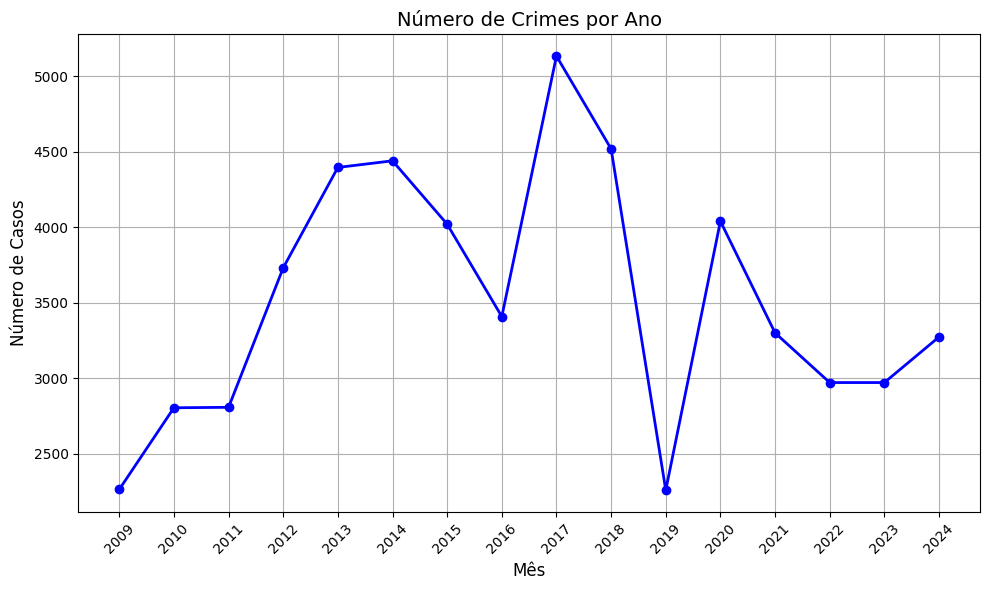

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(casos_por_ano.index.astype(str), casos_por_ano.values, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Número de Crimes por Ano', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

*Perguntas a serem feitas:*
1. Quais os locais onde mais acontecem os crimes?
  1. Por quê?
  2. Qual a proporção de crimes relacionados à população? # Novo dataset
2. Por que houve uma redução significativa em 2019? (https://www.policiacivil.ce.gov.br/2020/01/07/ceara-fecha-o-ano-de-2019-com-50-de-reducao-nas-mortes-provocadas-por-crimes-violentos-resultado-e-o-melhor-da-decada/)
  1. Quais as ações que levaram o número a decair tanto?
  2. Por que aumentou tanto em 2020?
  3. A partir de 2019, quais foram os principais locais dos crimes?
3. Quais os perfis das vítimas, no geral? (gênero, raça, idade, escolaridade, etc)
4. Qual o horário em que mais acontece os crimes? E o dia da semana?
5. Qual a relação entre os meses em que ocorreram os crimes e a quantidade?

EXPORTAR DADOS DE CRIMES

In [ ]:
df_fortaleza = df.where(df["Município"] == "Fortaleza").dropna()
df_fortaleza

,Município,AIS,Natureza,Data,Hora,Dia da Semana,Meio Empregado,Gênero,Idade da Vítima,Escolaridade da Vítima,Raça da Vítima
4,Fortaleza,AIS 10,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,Não Informada,Não Informada,Não Informada
5,Fortaleza,AIS 01,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,Não Informada,Não Informada,Não Informada
6,Fortaleza,AIS 08,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma de fogo,Masculino,Não Informada,Não Informada,Não Informada
10,Fortaleza,AIS 02,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma branca,Masculino,Não Informada,Não Informada,Não Informada
11,Fortaleza,AIS 08,HOMICIDIO DOLOSO,2009-01-01,00:00:00,Quinta,Arma branca,Masculino,Não Informada,Não Informada,Não Informada
...,...,...,...,...,...,...,...,...,...,...,...
56297,Fortaleza,AIS 08,HOMICIDIO DOLOSO,2024-12-29,20:35:00.010000,Domingo,Arma branca,Masculino,30,Ensino Médio Completo,Parda
56305,Fortaleza,AIS 09,HOMICIDIO DOLOSO,2024-12-30,16:16:00.019000,Segunda,Arma de fogo,Masculino,35,Ensino Fundamental Incompleto,Não Informada
56309,Fortaleza,AIS 09,HOMICIDIO DOLOSO,2024-12-31,12:00:00,Terça,Arma de fogo,Masculino,40,Ensino Fundamental Completo,Não Informada
56317,Fortaleza,AIS 08,HOMICIDIO DOLOSO,2024-12-31,17:37:00.019000,Terça,Arma de fogo,Masculino,66,Alfabetizado,Não Informada


In [ ]:
crimes_por_ais = df_fortaleza['AIS'].value_counts().to_dict()
crimes_por_ais

{'AIS 03': 3010,
 'AIS 02': 2742,
 'AIS 07': 2622,
 'AIS 09': 2585,
 'AIS 06': 2526,
 'AIS 08': 2351,
 'AIS 05': 1551,
 'AIS 04': 1166,
 'AIS 10': 1024,
 'AIS 01': 933,
 'AIS Não Identificada (Fortaleza)': 3}

In [ ]:
df_fortaleza.groupby("AIS").size().tail(2)

,0
AIS,
AIS 10,1024
AIS Não Identificada (Fortaleza),3


array([[<Axes: title={'center': 'Data'}>]], dtype=object)

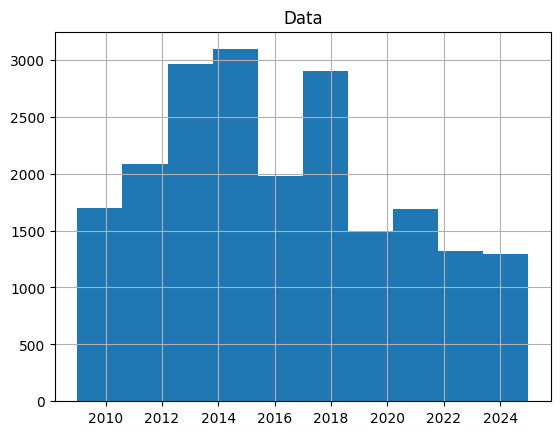

In [ ]:
df_fortaleza.hist()

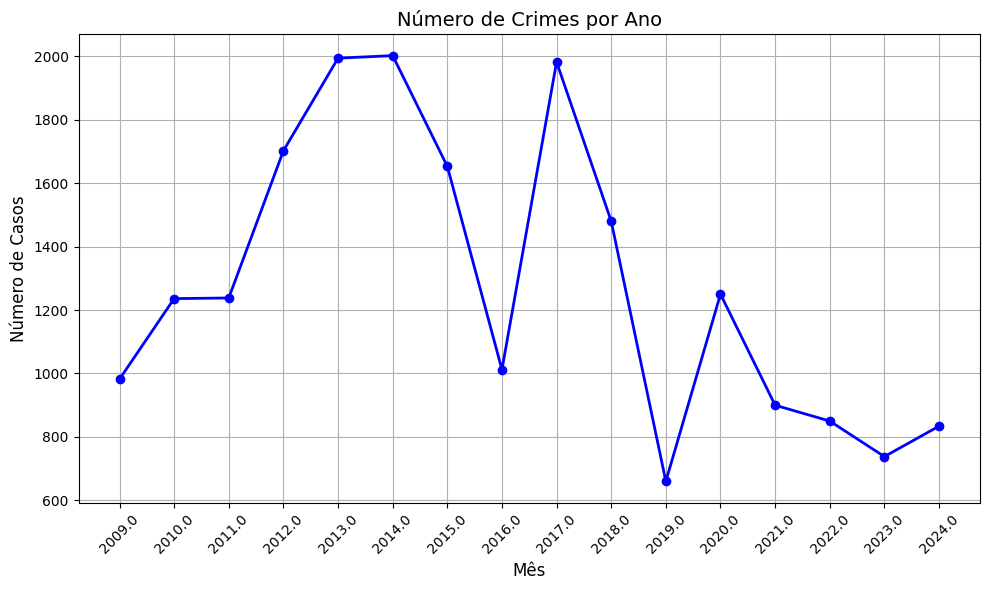

In [ ]:
casos_por_ano = df_fortaleza.groupby(df_fortaleza['Data'].dt.year).size()

plt.figure(figsize=(10, 6))
plt.plot(casos_por_ano.index.astype(str), casos_por_ano.values, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Número de Crimes por Ano', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

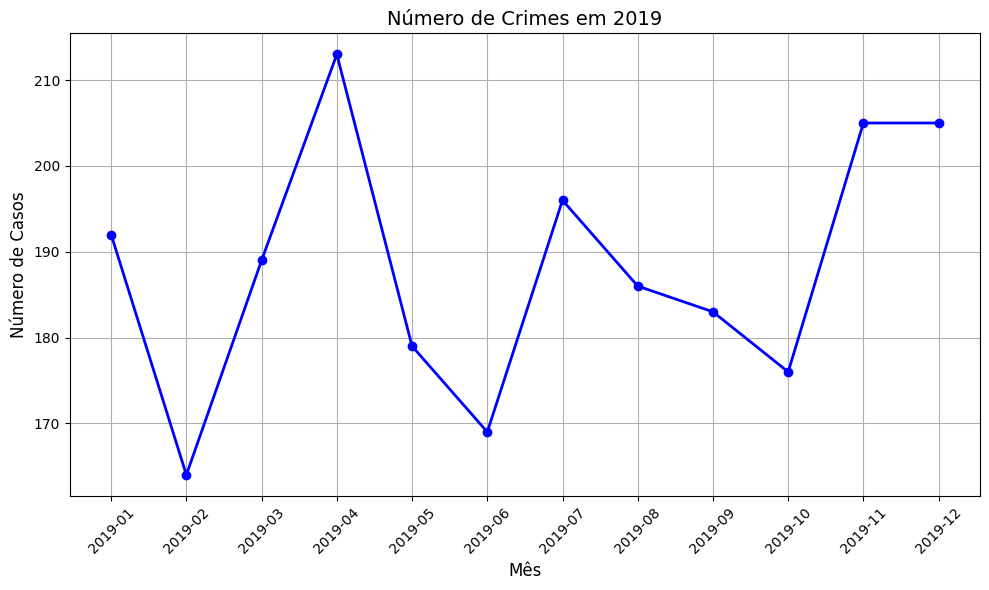

In [ ]:
df_2019 = df
df_2019["ano"] = df_2019["Data"].dt.year.astype(str)
df_2019 = df_2019[df_2019["ano"] == "2019"]

casos_por_mes = df_2019.groupby(df_2019['Data'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
plt.plot(casos_por_mes.index.astype(str), casos_por_mes.values, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Número de Crimes em 2019', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

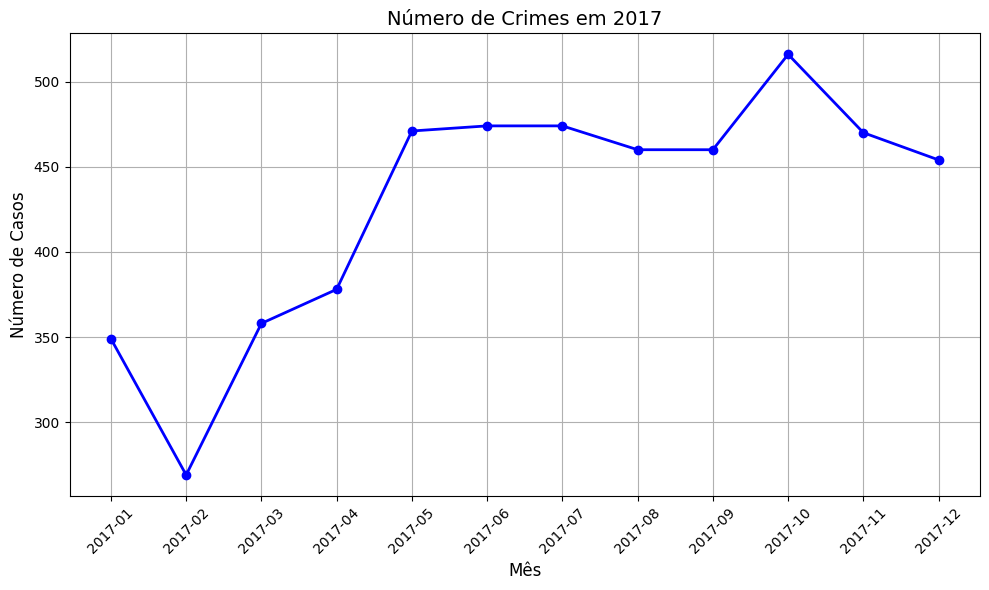

In [ ]:
df_2017 = df
df_2017["ano"] = df_2017["Data"].dt.year.astype(str)
df_2017 = df_2017[df_2017["ano"] == "2017"]

casos_por_mes = df_2017.groupby(df_2017['Data'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
plt.plot(casos_por_mes.index.astype(str), casos_por_mes.values, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Número de Crimes em 2017', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
def plot_heat_map_var(df, column):
  import seaborn as sns

  var_counts = df[column].value_counts().sort_index()

  var_df = pd.DataFrame({column: var_counts.index, 'Count': var_counts.values})
  var_df_pivot = var_df.pivot_table(index=column, values='Count')

  # Heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(var_df_pivot, annot=var_df_pivot.values.astype(int), fmt='d',
              cmap="YlGnBu", linewidths=0.5)

  plt.title(f"Distribuição: {column.title()}")
  plt.ylabel(f"Categorias de {column.title()}")
  plt.tight_layout()
  plt.show()

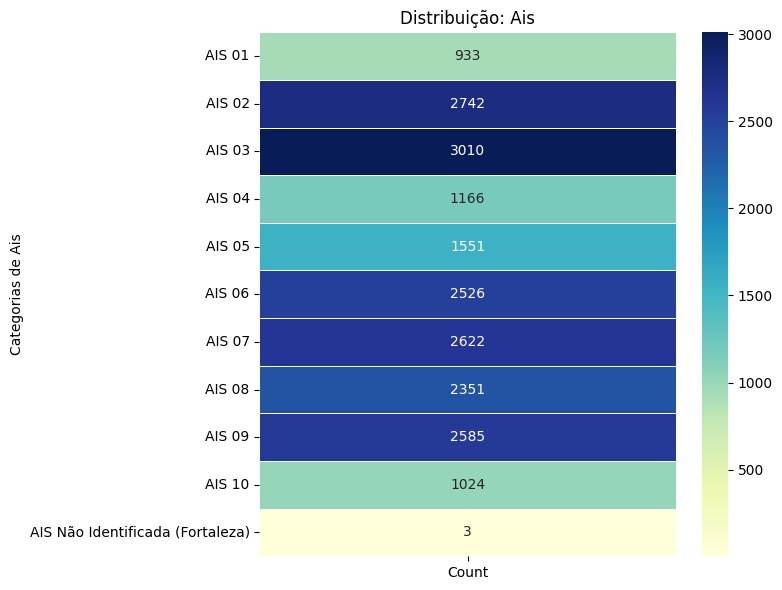

In [ ]:
plot_heat_map_var(df_fortaleza, "AIS")

- Bem distribuído entre algumas áreas.
- Dá pra notar as principais.

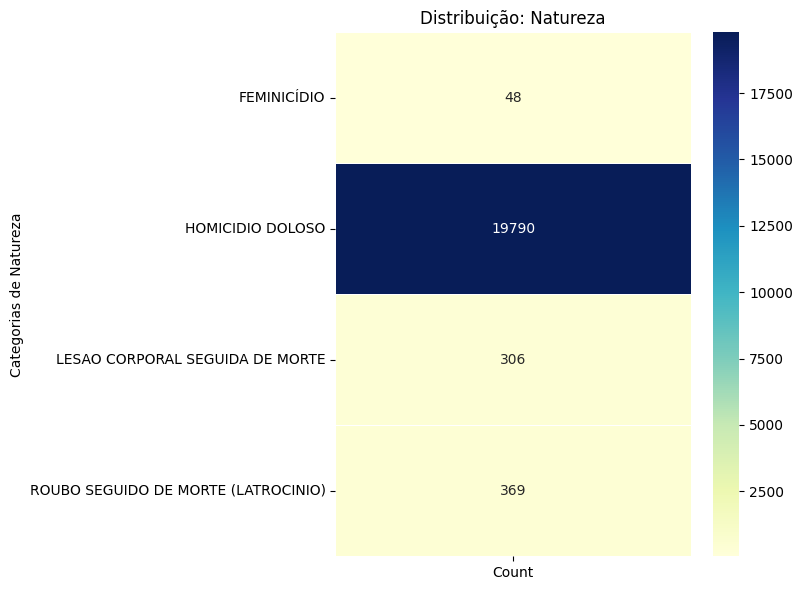

In [ ]:
plot_heat_map_var(df_fortaleza, "Natureza")

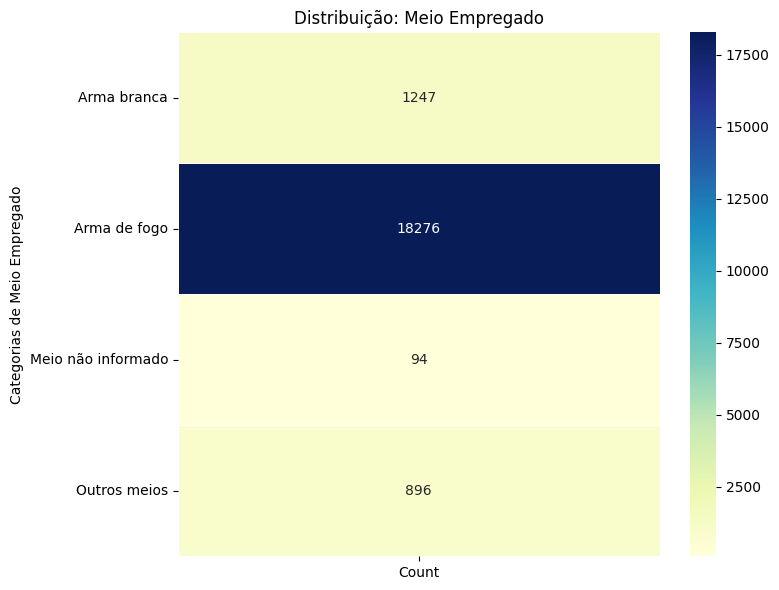

In [ ]:
plot_heat_map_var(df_fortaleza, "Meio Empregado")

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

def plot_pizza_chart(df, column):
    colors = cm.Paired.colors
    var_counts = df[column].value_counts().sort_index()

    plt.figure(figsize=(8, 8))
    wedges, _, autotexts = plt.pie(
        var_counts.values,
        labels=None,  # Remover os rótulos do gráfico
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops=dict(width=0.4, edgecolor='w'),
        pctdistance=0.85
    )

    # Ajuste do texto percentual
    for autotext in autotexts:
        autotext.set_fontsize(9)
        autotext.set_color('black')

    # Círculo central para visual "donut"
    centre_circle = plt.Circle((0, 0), 0.65, fc='white')
    plt.gca().add_artist(centre_circle)

    # Adiciona legenda fora do gráfico
    plt.legend(
        wedges,
        var_counts.index,
        title=column.title(),
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10,
        title_fontsize=11
    )

    plt.title(f"Distribuição da variável: {column.title()}", fontsize=14)
    plt.tight_layout()
    plt.show()




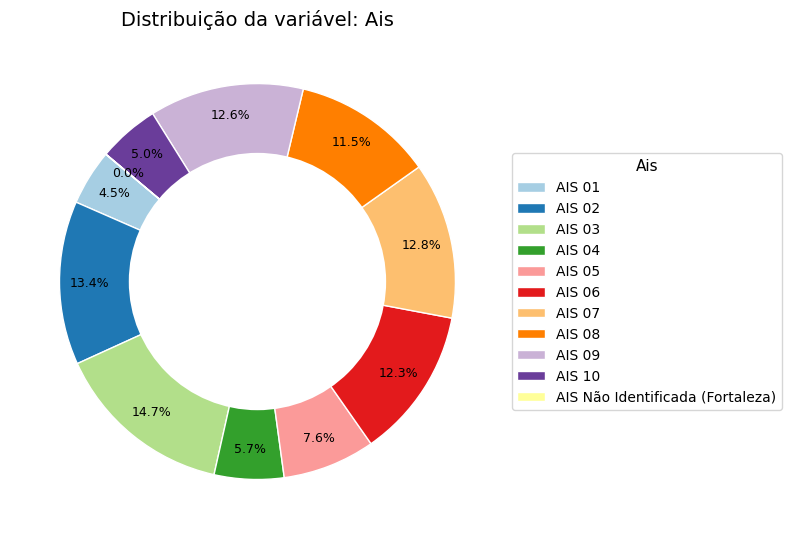

In [ ]:
plot_pizza_chart(df_fortaleza, "AIS")

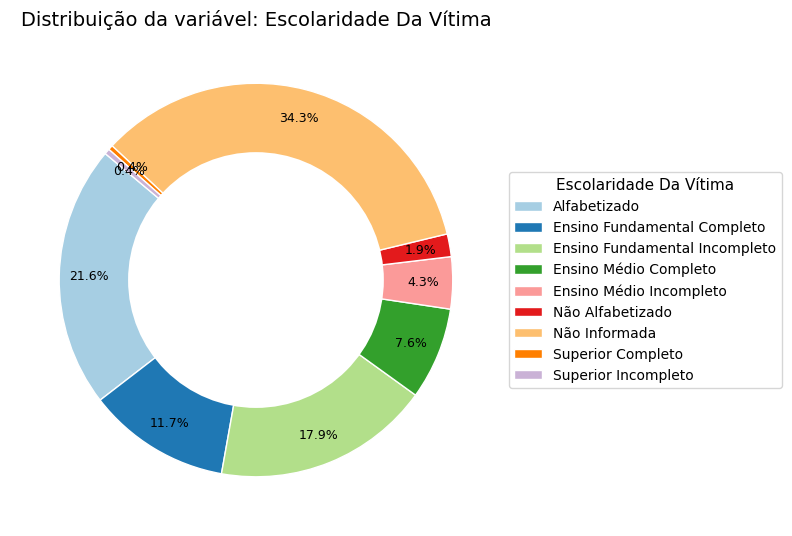

In [ ]:
plot_pizza_chart(df_fortaleza, "Escolaridade da Vítima")

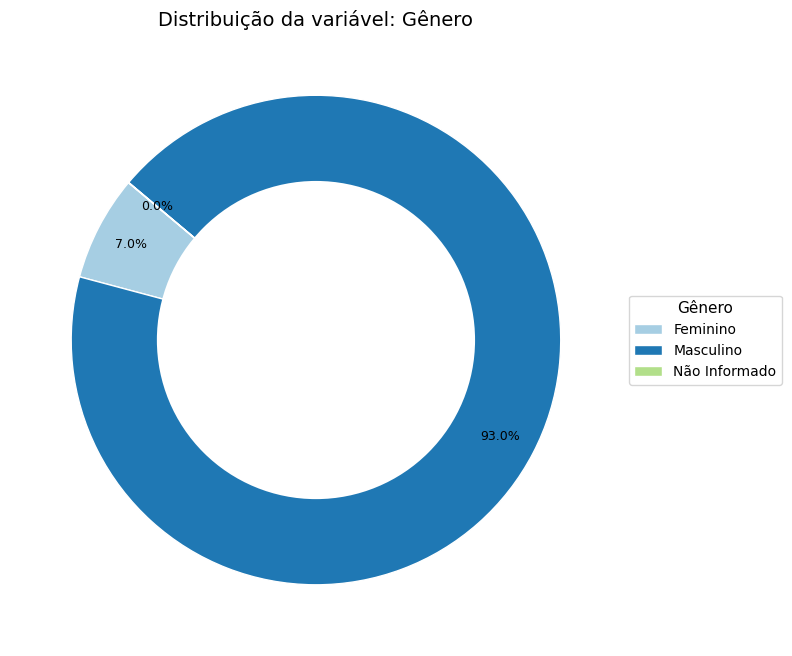

In [ ]:
plot_pizza_chart(df_fortaleza, "Gênero")

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

def plot_pizza_chart_percents_out(df, column):
    colors = cm.Paired.colors
    var_counts = df[column].value_counts().sort_index()
    total = var_counts.sum()
    percentages = (var_counts / total * 100).round(1)

    labels_with_pct = [f"{cat} ({pct}%)" for cat, pct in zip(var_counts.index, percentages)]

    plt.figure(figsize=(8, 8))
    wedges, _ = plt.pie(
        var_counts.values,
        labels=None,  # Sem rótulos diretamente no gráfico
        startangle=140,
        colors=colors,
        wedgeprops=dict(width=0.4, edgecolor='w')
    )

    # Círculo central para visual "donut"
    centre_circle = plt.Circle((0, 0), 0.65, fc='white')
    plt.gca().add_artist(centre_circle)

    # Adiciona legenda com percentual
    plt.legend(
        wedges,
        labels_with_pct,
        title=column.title(),
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10,
        title_fontsize=11
    )

    plt.title(f"Distribuição da variável: {column.title()}", fontsize=14)
    plt.tight_layout()
    plt.show()


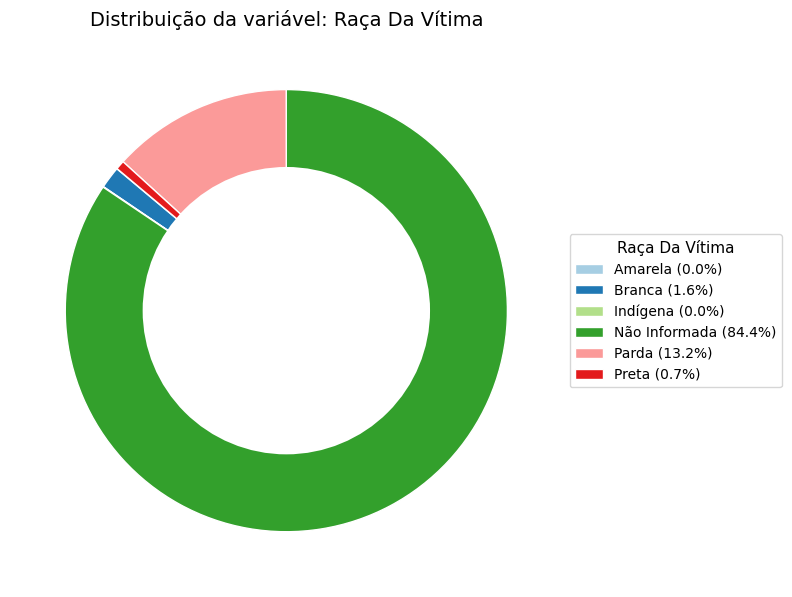

In [ ]:
plot_pizza_chart_percents_out(df_fortaleza, "Raça da Vítima")

In [ ]:
def plot_hist(df, column: str):
  numeric_data = [int(x) for x in df[column].dropna() if isinstance(x, (int, float))]

  # Plotar o histograma
  plt.figure(figsize=(10, 6))
  plt.hist(numeric_data, bins=20, color='skyblue', edgecolor='black')
  plt.title(f'Histograma: {column.title()}')
  plt.xlabel(column.title())
  plt.ylabel('Frequência')
  plt.grid(True)
  plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde, mode

def plot_hist_with_timeseries(df, column: str, measure: str = None):
    # Filtra dados numéricos válidos
    numeric_data = [float(x) for x in df[column].dropna() if isinstance(x, (int, float))]

    if len(numeric_data) == 0:
        print("Sem dados válidos para análise.")
        return

    # Estatísticas principais
    mean_val = np.mean(numeric_data)
    median_val = np.median(numeric_data)
    mode_val = mode(numeric_data, keepdims=False).mode
    q1 = np.percentile(numeric_data, 25)
    q3 = np.percentile(numeric_data, 75)

    if measure == "mediana":
        mad_val = np.mean(np.abs(numeric_data - median_val))
        dispersion_measure = "MDA"

    # Estimativa de densidade
    density = gaussian_kde(numeric_data)
    xs = np.linspace(min(numeric_data), max(numeric_data), 1000)
    density_vals = density(xs)

    # Plot
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.hist(numeric_data, bins=20, color='skyblue', edgecolor='black', alpha=0.5, density=True, label='Histograma')

    # Curva de densidade (como timeserie)
    plt.plot(xs, density_vals, color='darkblue', linewidth=2, label='Densidade (curva suavizada)')

    # Linhas verticais para estatísticas
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Média: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Mediana: {median_val:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='--', label=f'Moda: {mode_val:.2f}')
    plt.axvline(q1, color='orange', linestyle=':', label=f'1º Quartil: {q1:.2f}')
    plt.axvline(q3, color='orange', linestyle=':', label=f'3º Quartil: {q3:.2f}')

    if mad_val:
      plt.hlines(y=max(density_vals)*0.5, xmin=median_val - mad_val, xmax=median_val + mad_val,
           color='brown', linestyle='-', linewidth=2, label=f'{measure.title()} ± {dispersion_measure}')

    plt.title(f'Histograma e Curva de Densidade: {column.title()}')
    plt.xlabel(column.title())
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    if column == "Idade da Vítima":
      start = int(np.floor(min(numeric_data) / 10) * 10)  # arredonda para baixo múltiplo de 10
      end = int(np.ceil(max(numeric_data) / 10) * 10)    # arredonda para cima múltiplo de 10
      plt.xticks(np.arange(start, end+1, 10))

    plt.show()


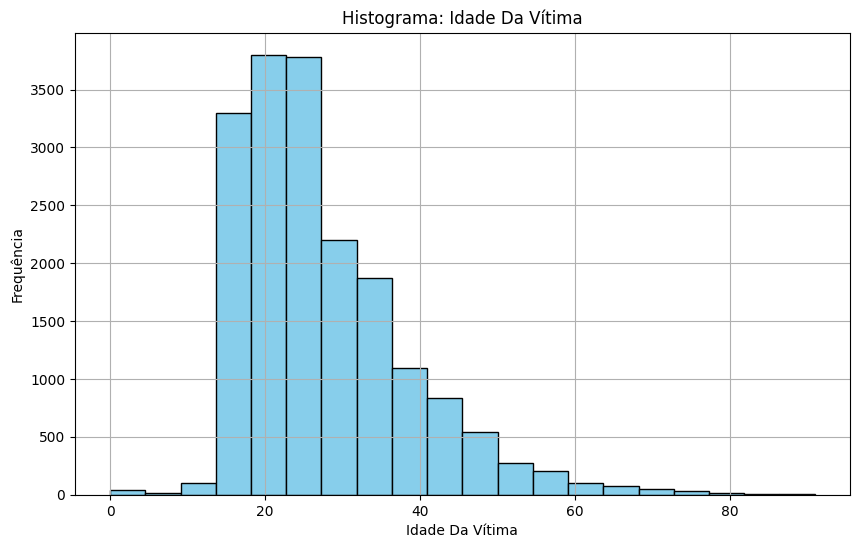

In [ ]:
plot_hist(df_fortaleza, "Idade da Vítima")

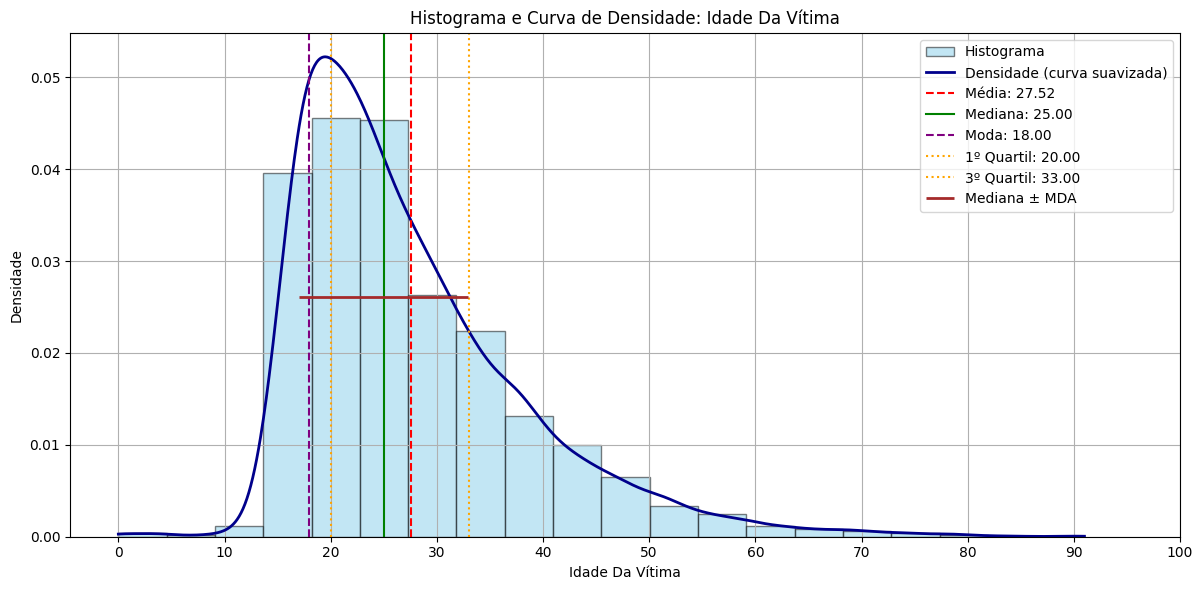

In [ ]:
plot_hist_with_timeseries(df_fortaleza, "Idade da Vítima", "mediana")

Observações:
- Média próxima da mediana.
- Concentração de valores à esquerda (left-skewed)
- Desvio médio é uma boa opção.
- Jovens: A maioria das vítimas foram jovens de 18 anos.
- O intervalo de idades maior das vítimas é entre 17 e 33 anos usando a mediana e o Desvio Médio Amostral (DMA)

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

def plot_horizontal_bar(df, column: str):
    data = df[column].dropna()
    counts = Counter(data)

    categories = list(counts.keys())
    frequencies = list(counts.values())

    # Gerar uma lista de cores usando um colormap do matplotlib
    colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

    plt.figure(figsize=(10, 6))
    plt.barh(categories, frequencies, color=colors, edgecolor='black')
    plt.title(f'{column.title()}')
    plt.xlabel('Contagem')
    plt.ylabel(column.title())
    plt.grid(axis='x')
    plt.show()


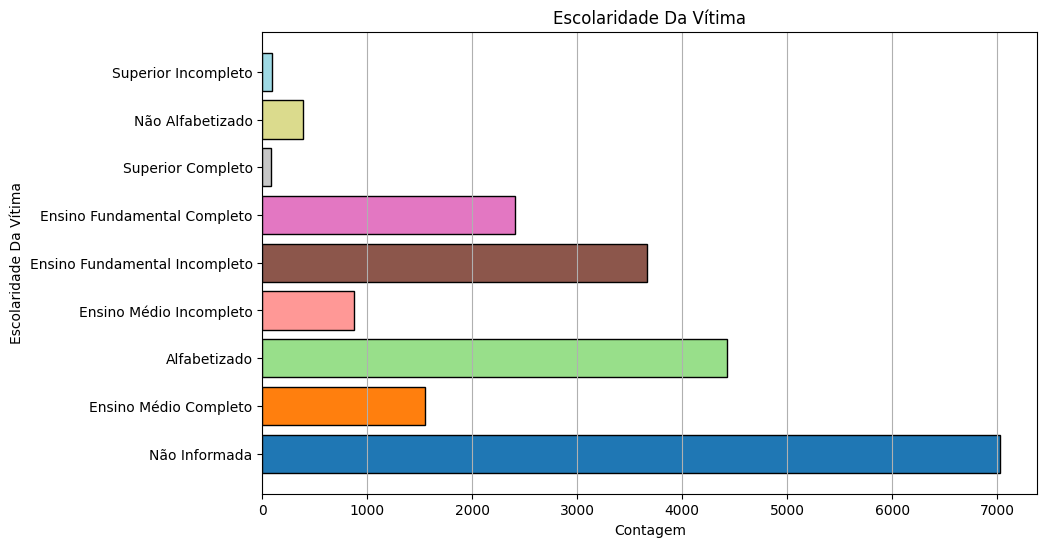

In [ ]:
plot_horizontal_bar(df_fortaleza, "Escolaridade da Vítima")

**DADOS DOS BAIRROS**

In [ ]:
import geopandas as gpd
import folium

In [ ]:
# Caminho local ou URL para o arquivo GeoJSON
geojson_path = "fortaleza_bairros.geojson"

# Carregar os dados geoespaciais
gdf = gpd.read_file(geojson_path)

# Calcular o centro do mapa
centro = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]

# Criar o mapa com Folium
mapa = folium.Map(location=centro, zoom_start=12)

# Adicionar os bairros como camada GeoJSON
folium.GeoJson(
    gdf,
    name="Bairros de Fortaleza",
    tooltip=folium.GeoJsonTooltip(fields=gdf.columns[:2].tolist(), aliases=["ID", "Nome"])
).add_to(mapa)

# Adicionar controle de camadas
folium.LayerControl().add_to(mapa)

# Salvar o mapa em HTML
mapa.save("mapa_fortaleza_bairros.html")

print("Mapa salvo como 'mapa_fortaleza_bairros.html'")